In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import blackjack as bj
import numpy as np
from collections import defaultdict
import importlib

importlib.reload(bj)

<module 'blackjack' from '/Users/fraserbytheway/PycharmProjects/DataML/Reinforcement Learning/MCBlackjack/blackjack.py'>

Conduct a BlackJack Simulation

In [6]:
mc_runs = 10000

trials = [0 for _ in range(mc_runs)]

for i in range(mc_runs):
    if i % 100 == 0:
        print(f"iteration {i}, {mc_runs - i} sims remain")
    trials[i] = bj.mp_sim(8, 10000, exp_rate=0.2, learn_rate=0.01)

result = bj.merge_q_values(trials)

iteration 0, 10000 sims remain
iteration 100, 9900 sims remain
iteration 200, 9800 sims remain
iteration 300, 9700 sims remain
iteration 400, 9600 sims remain
iteration 500, 9500 sims remain
iteration 600, 9400 sims remain
iteration 700, 9300 sims remain
iteration 800, 9200 sims remain
iteration 900, 9100 sims remain
iteration 1000, 9000 sims remain
iteration 1100, 8900 sims remain
iteration 1200, 8800 sims remain
iteration 1300, 8700 sims remain
iteration 1400, 8600 sims remain
iteration 1500, 8500 sims remain
iteration 1600, 8400 sims remain
iteration 1700, 8300 sims remain
iteration 1800, 8200 sims remain
iteration 1900, 8100 sims remain
iteration 2000, 8000 sims remain
iteration 2100, 7900 sims remain
iteration 2200, 7800 sims remain
iteration 2300, 7700 sims remain
iteration 2400, 7600 sims remain
iteration 2500, 7500 sims remain
iteration 2600, 7400 sims remain
iteration 2700, 7300 sims remain
iteration 2800, 7200 sims remain
iteration 2900, 7100 sims remain
iteration 3000, 7000 

In [7]:
res = defaultdict(lambda: (-2.0, None))
res_ace = defaultdict(lambda: (-2.0, None))

for (state, action), value in result.items():
    suc = value['success']
    substate = state[:-1]

    if state[2] == 0:
        if suc > res[substate][0]:
            res[substate] = (suc, action)
    else:
        if suc > res_ace[substate][0]:
            res_ace[substate] = (suc, action)

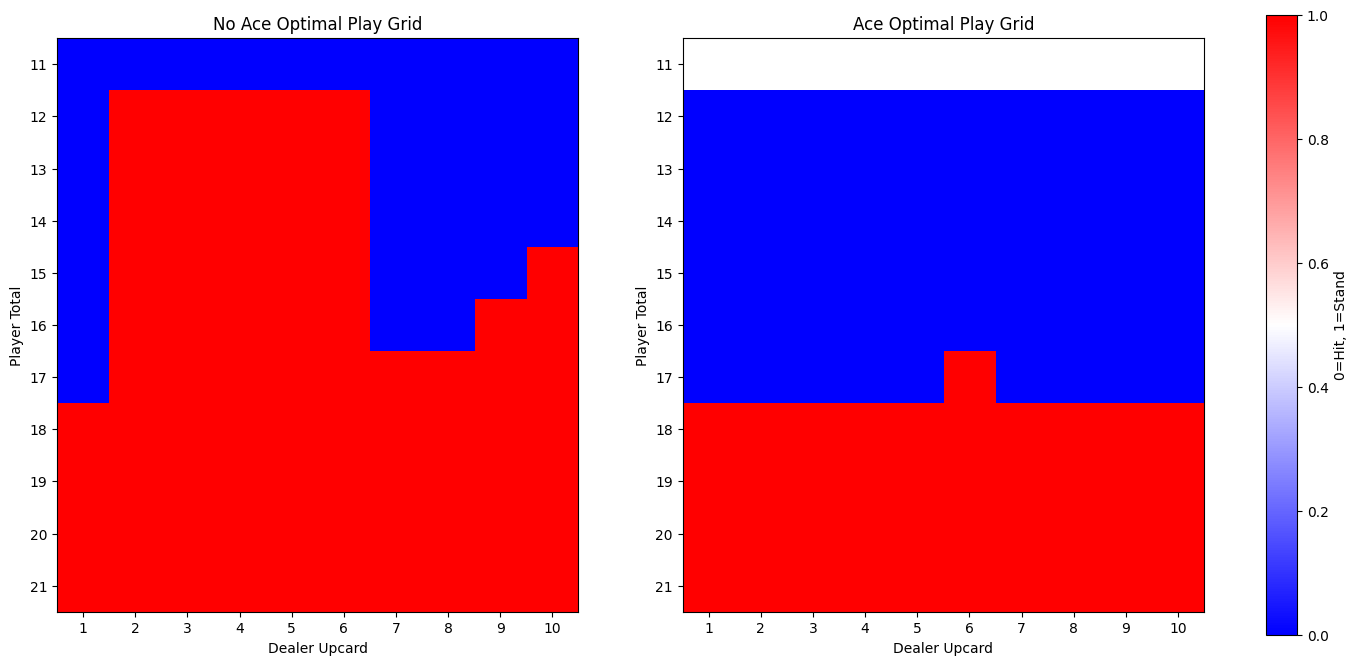

In [8]:
def hit_stand(ref, title, ax):
    dealer_vals = range(1, 11)
    player_vals = range(11, 22)

    grid = np.full((len(player_vals), len(dealer_vals)), np.nan)
    for [player, dealer], [val, action] in ref.items():
        if player >= 11:
            if player in player_vals and dealer in dealer_vals:
                grid[player - 11, dealer - 1] = 1 if action else 0

    im = ax.imshow(grid, cmap="bwr", origin="upper", vmin=0, vmax=1)
    ax.set_xticks(range(len(dealer_vals)), dealer_vals)
    ax.set_yticks(range(len(player_vals)), player_vals)
    ax.set_title(title)
    ax.set_xlabel("Dealer Upcard")
    ax.set_ylabel("Player Total")
    return im

fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs = axs.flatten()

im0 = hit_stand(res, "No Ace Optimal Play Grid", axs[0])
im1 = hit_stand(res_ace, "Ace Optimal Play Grid", axs[1])

plt.colorbar(im0, ax=axs, label="0=Hit, 1=Stand", fraction=0.025)
plt.show()